# Creando nuestro propio KNN - Algoritmo K Vecinos 

* Se basa en el concepto de la distancia Euclidea 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings #para gestionar errores y mostrar al usuario, especialmente que no pida un K menor a los vecinos existentes
from math import sqrt
from collections import Counter#sistema de votos mas populares

In [5]:
#dataset de ejemplo
dataset ={
    'k':[[1,2],[2,3],[3,1]],
    'r':[[6,5],[7,7],[8,6]]
}
new_point = [5,7] # nuevo punto a clasificar

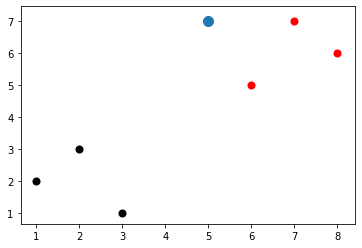

In [8]:
#hacemos un doble array
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100)

Vamos a definir _(manualmente)_ una funcion que nos permite clasificar ese puntito azul, utilizando el algoritmo K-Vecinos

In [41]:
#data=dataset; predict= dato a predecir, K=numero de predictores que tomaran la decision
def k_nearest_neighbors(data, predict, k=3, verbose= False):#esa variable se usa para imprimir cosas en pantalla
    
    if len(data) >= k:
        warnings.warn("Upps! tu valor K es mayor que el total de datos disponibles")
    
    distances =[]#aqui almacenamos las distancias medidas entre cada puntito
    for group in data:
        for feature in data[group]:
           # d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2) #calculamos usando distancia euclidea
           # d = np.sqrt(np.sum((np.array(feature) - np.array(predict) )**2))#modo numpy mas rapido y eficiente
            #continuamos optimizando
            d = np.linalg.norm(np.array(feature) - np.array(predict)) #-> mide la magnitud de un vector,(este metodo es el mas eficiente)
            distances.append([d,group])#d-> distancia; group ->grupo que estoy clasificando
    if verbose:        
        print(distances)
            
    votes = [i[1] for i in sorted(distances)[:k]]#sorted ordena por la primera columna
    #nos quedara una lista de la distancia mas corta a la distancia mas larga
    if verbose:
        print(votes)
            
    vote_result = Counter(votes).most_common(1)[0][0]#el resultado se ve mas o menos asi: ('r',2), ('k',1)
    # como pusimos [0][0] devolvera unicamente el elemento mas comun
    if verbose:
        print(vote_result)
    return vote_result #devolvemos el resultado dela votación

#### Notas de esta clase
* Este metodo puede convertirse en un metodo muyy muuuuy lento si tenemos muchos datos contra la cual comparar el nuevo punto
    * Podemos indagar si existe un metodo de hacer mas rapido (lo revisaremos en la siguiente clase)

In [17]:
result = k_nearest_neighbors(dataset,new_point)

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]
['r', 'r', 'r']
r


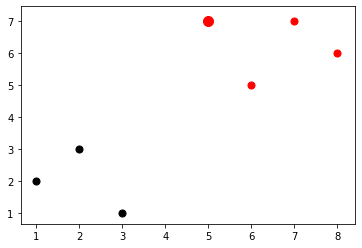

In [18]:
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

Nuestro punto fue clasificado como ROJO!!!

#### NOTA
El algoritmo funciona a pequeña escala, pero si lo hacemos con datasets como el del cancer tendremos una eficacia mucho mas reducida

### Ejemplo con otros puntos

[[2.8284271247461903, 'k'], [1.4142135623730951, 'k'], [3.0, 'k'], [3.1622776601683795, 'r'], [5.0, 'r'], [5.385164807134504, 'r']]
['k', 'k', 'k']
k


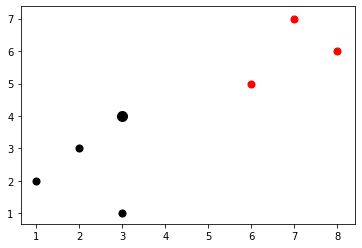

In [22]:
new_point=[3,4]
result = k_nearest_neighbors(dataset,[new_point])
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

**Punto 3,4 clasificado en grupo de los negros**

[[4.301162633521313, 'k'], [2.9154759474226504, 'k'], [3.8078865529319543, 'k'], [1.5811388300841898, 'r'], [3.5355339059327378, 'r'], [3.8078865529319543, 'r']]
['r', 'k', 'r']
r


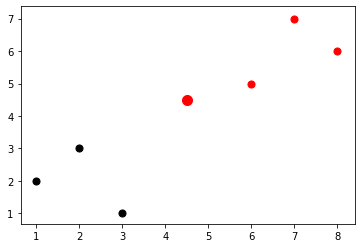

In [23]:
new_point=[4.5,4.5]
result = k_nearest_neighbors(dataset,[new_point])
[[plt.scatter(ii[0], ii[1], s=50, color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s=100, color=result)

Puntos mas centrales se clasifican como ROJO

Al algoritmo no le importa la subjetividad, el calcula la distancia para cada punto, recoje los votos y arroja el resultado

## Aplicando nuestro KKN al dataset del cancer

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("../datasets/cancer/breast-cancer-wisconsin.data.txt")

In [27]:
df.replace("?", -99999, inplace=True)

In [28]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]
df.drop(["name"], 1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [29]:
#realizamos una conversion de los datos enteros a tipo Float para mejorar su operatividad
full_data = df.astype(float).values.tolist()

In [30]:
full_data

[[5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 10.0, 10.0, 8.0, 7.0, 10.0, 9.0, 7.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 10.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 5.0, 2.0],
 [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [5.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 1.0, 4.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0],
 [8.0, 7.0, 5.0, 10.0, 7.0, 9.0, 5.0, 5.0, 4.0, 4.0],
 [7.0, 4.0, 6.0, 4.0, 6.0, 1.0, 4.0, 3.0, 1.0, 4.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [10.0, 7.0, 7.0, 6.0, 4.0, 10.0, 4.0, 1.0, 2.0, 4.0],
 [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1

Vamos a dividir los datos en dos conjuntos TEST y PRUEBA. Pero usando un metodo mas manual del conocido

In [31]:
import random

In [32]:
random.shuffle(full_data)#mezclamos los datos

In [33]:
test_size=0.2

In [34]:
train_set = {2:[],4:[]}
test_set = {2:[],4:[]}

In [35]:
train_data = full_data[:-int(test_size*len(full_data))]#desde el inicio hasta el 20% dado
test_data = full_data[-int(test_size*len(full_data)):]#desde el siguiente al 20% hasta el final

In [37]:
for i in train_data:#convierto esos datos que estan en array y los meto en mi variable 
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [38]:
train_set

{2: [[1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0],
  [3.0, 1.0, 1.0, 3.0, 8.0, 1.0, 5.0, 8.0, 1.0],
  [3.0, 1.0, 4.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 5.0, 3.0, 2.0],
  [1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [5.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [6.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0],
  [4.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0],
  [1.0, 1.0, 1.0,

Ahora debemos entrenar y testear el modelo usando los pasos que ya conocemos

In [42]:
correct = 0
total = 0 
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)#datos de aprendizaje, valor a clasificar y k=numero de vecinos que deciden
        
        if group == vote:
            correct+=1 #total de correctos
        total+=1 #total de datos evaluados
print("Eficacia del KNN = ",correct/total)

Eficacia del KNN =  0.9784172661870504


Primera tirada me dio 97% de eficacia

## **Cual elegir? Mi modelo o el de sckit-learn?**

* Al final ambos tendran la misma probabilidad
* Pero ojo **no somos tan buenos como el algoritmo**
* Sckit-Learn sera siempre un poquito mas rapido
    * Pero muuuy rapida comparada con grandes datasets
    * Usan mas RAM pero son mas rapidos

### **Otras notas**
* El machine learning no es 100% efectivo, ninguno.
* Puedes ejecutar multiples algoritmos de ML y decidir cual es el mejor
    * Puedes usar multihilos